In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# MLP Assignment - Tier 1 (Assisted Implementation)
# Zero to Transformer - Week 1


In [2]:
# always use this torch code to use gpu if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


# Load and preprocess the MNIST dataset


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # normalize to mean, std of MNIST
])

# Load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

# Load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

In [4]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

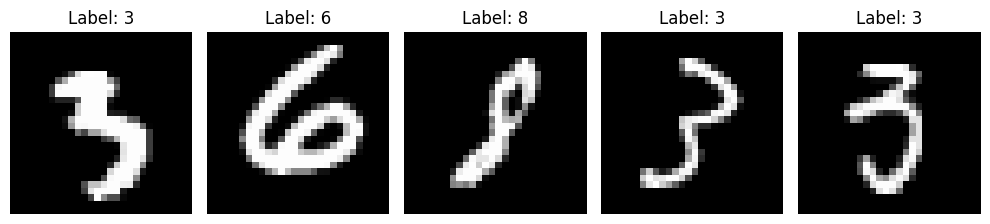

In [5]:
def visualize_samples(dataloader, num_samples=5):
    """Display some sample images from the dataset"""
    examples = iter(dataloader)
    images, labels = next(examples)
    
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i][0].numpy(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_samples(train_loader) # comment out if don't want to visualize

# Define the Multi-Layer Perceptron (MLP) model class

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        """
        Initialize the MLP model.
        
        Args:
            input_size (int): Size of the input features
            hidden_size1 (int): Size of the first hidden layer
            hidden_size2 (int): Size of the second hidden layer
            num_classes (int): Number of output classes
        """
        super(MLP, self).__init__()
        
        # TODO: Define the layers of the network
        # Layer 1: Input layer to first hidden layer with ReLU activation
        self.layer1 = nn.Sequential(
            # YOUR CODE HERE: Create a linear layer from input_size to hidden_size1
            nn.Linear(input_size, hidden_size1),
            # YOUR CODE HERE: Add a ReLU activation function
            nn.ReLU()
        )
        
        # Layer 2: First hidden layer to second hidden layer with ReLU activation
        self.layer2 = nn.Sequential(
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU()
            # YOUR CODE HERE: Add a ReLU activation function
        )
        
        # Layer 3: Second hidden layer to output layer (no activation, will be applied in loss function)
        self.layer3 = nn.Linear(hidden_size2, num_classes)
        # YOUR CODE HERE: Create a linear layer from hidden_size2 to num_classes
        
    def forward(self, x):
        """
        Forward pass through the network.
        
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, input_size]
            
        Returns:
            torch.Tensor: Output tensor of shape [batch_size, num_classes]
        """
        # TODO: Implement the forward pass
        # Flatten the input image
        # YOUR CODE HERE: Reshape x from [batch_size, 1, 28, 28] to [batch_size, 784]
        # can use torch.flatten, reshape, or view

        batch_size, _, height, width = x.shape

        reshaped = x.reshape(batch_size, height * width)
        viewed = x.view(batch_size, height * width)
        flattened = torch.flatten(x, start_dim=1)


        l1 = self.layer1(viewed)
        l2 = self.layer2(l1)
        out = self.layer3(l2)
        
        return out

# Hyperparameters


In [7]:

input_size = 28 * 28  # MNIST images are 28x28 pixels
hidden_size1 = 256
hidden_size2 = 128
num_classes = 10      # 10 digits (0-9)
num_epochs = 5
learning_rate = 0.001

In [8]:
model = MLP(input_size, hidden_size1, hidden_size2, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [15]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    """
    Train the model.
    
    Args:
        model (nn.Module): The neural network model
        train_loader (DataLoader): DataLoader for training data
        criterion: Loss function
        optimizer: Optimization algorithm
        num_epochs (int): Number of training epochs
    
    Returns:
        list: Training losses for each epoch
    """
    model.train()  # Set the model to training mode
    train_losses = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for i, (images, labels) in enumerate(train_loader):
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)
            
            # TODO: Implement the training step
            # YOUR CODE HERE: Clear the gradients
            optimizer.zero_grad()
            
            # Forward pass
            # YOUR CODE HERE: Get the outputs from the model
            output = model(images)
            
            # Calculate loss
            # YOUR CODE HERE: Calculate the loss using criterion, outputs, and labels
            loss = criterion(output, labels)

            # Backward pass and optimize
            
            # YOUR CODE HERE: Update the parameters
            loss.backward() # Backpropagate the loss
            optimizer.step()
            running_loss += loss.item()
            
            # Print statistics every 100 batches
            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
        
        # Record the average loss for this epoch
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    return train_losses

In [19]:
train_losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

Epoch [1/5], Step [100/938], Loss: 0.0030
Epoch [1/5], Step [200/938], Loss: 0.0432
Epoch [1/5], Step [300/938], Loss: 0.0225
Epoch [1/5], Step [400/938], Loss: 0.0110
Epoch [1/5], Step [500/938], Loss: 0.0164
Epoch [1/5], Step [600/938], Loss: 0.0235
Epoch [1/5], Step [700/938], Loss: 0.0141
Epoch [1/5], Step [800/938], Loss: 0.0006
Epoch [1/5], Step [900/938], Loss: 0.0534
Epoch [1/5], Loss: 0.0316
Epoch [2/5], Step [100/938], Loss: 0.0049
Epoch [2/5], Step [200/938], Loss: 0.0061
Epoch [2/5], Step [300/938], Loss: 0.0683
Epoch [2/5], Step [400/938], Loss: 0.0072
Epoch [2/5], Step [500/938], Loss: 0.0309
Epoch [2/5], Step [600/938], Loss: 0.1074
Epoch [2/5], Step [700/938], Loss: 0.0138
Epoch [2/5], Step [800/938], Loss: 0.0242
Epoch [2/5], Step [900/938], Loss: 0.0055
Epoch [2/5], Loss: 0.0292
Epoch [3/5], Step [100/938], Loss: 0.0313
Epoch [3/5], Step [200/938], Loss: 0.0028
Epoch [3/5], Step [300/938], Loss: 0.0552
Epoch [3/5], Step [400/938], Loss: 0.0353
Epoch [3/5], Step [500/9

In [17]:
def evaluate_model(model, test_loader):
    """
    Evaluate the model on the test data.
    
    Args:
        model (nn.Module): The neural network model
        test_loader (DataLoader): DataLoader for test data
    
    Returns:
        float: Accuracy of the model on the test data
    """
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient calculation for inference
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # TODO: Implement the evaluation step
            # YOUR CODE HERE: Get the outputs from the model
            out = model(images)
            
            # Get the predicted class (index with highest value)
            # YOUR CODE HERE: Get the predicted class indices
            _, predicted = torch.max(out.data, 1)    

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

In [20]:
evaluate_model(model, test_loader=test_loader)

Test Accuracy: 97.86%


97.86

In [11]:
def plot_loss(train_losses):
    """Plot the training loss over epochs"""
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
    plt.title('Training Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

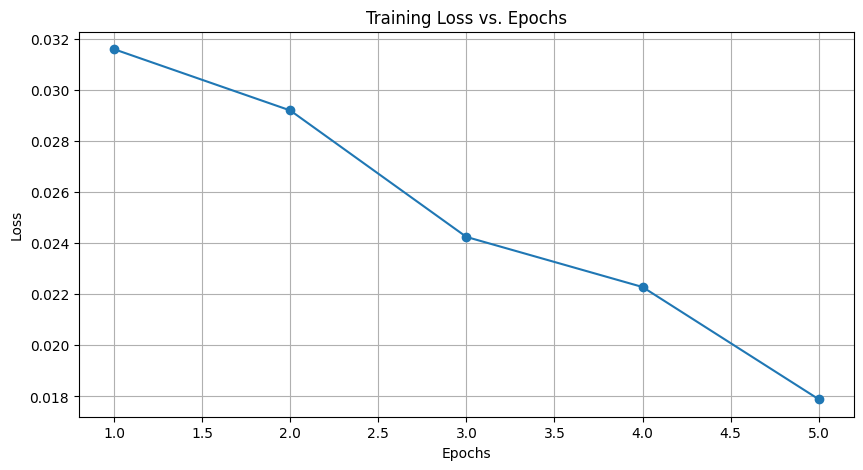

In [21]:
plot_loss(train_losses)

In [ ]:
# to save model, uncomment and run:
# torch.save(model.state_dict(), 'mlp_model.pth')
# print("Model saved to 'mlp_model.pth'")